In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Ecommerce Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [6]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# EDA Exploratry Data Anysis

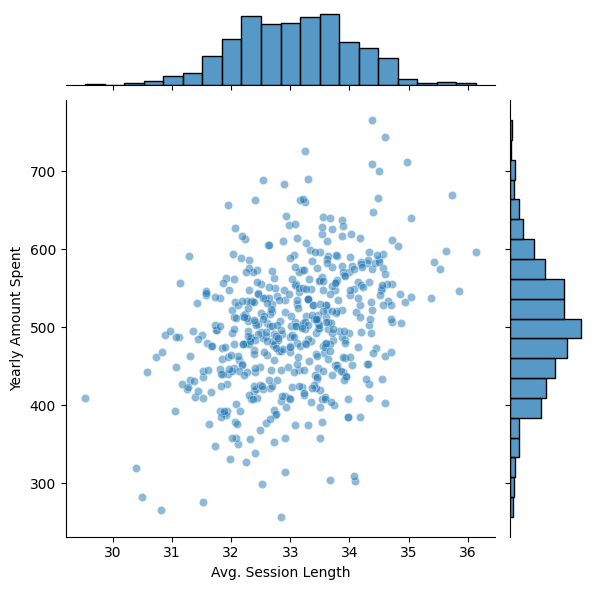

In [9]:
sns.jointplot(x="Avg. Session Length",y="Yearly Amount Spent",data=df, alpha=0.5)

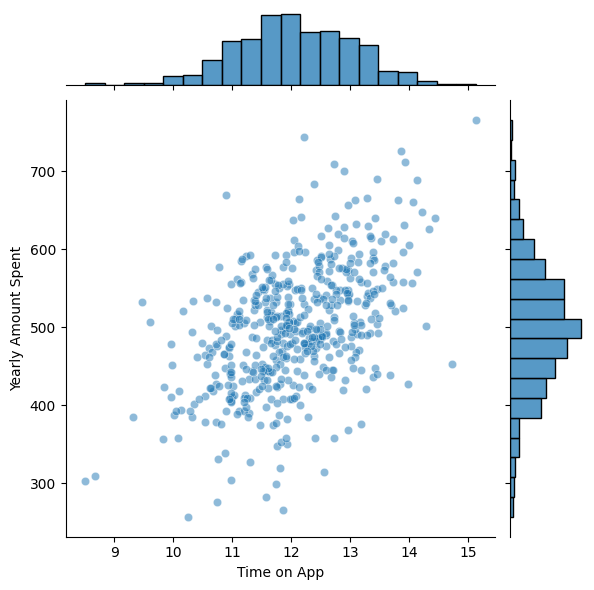

In [10]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent",data=df, alpha=0.5)

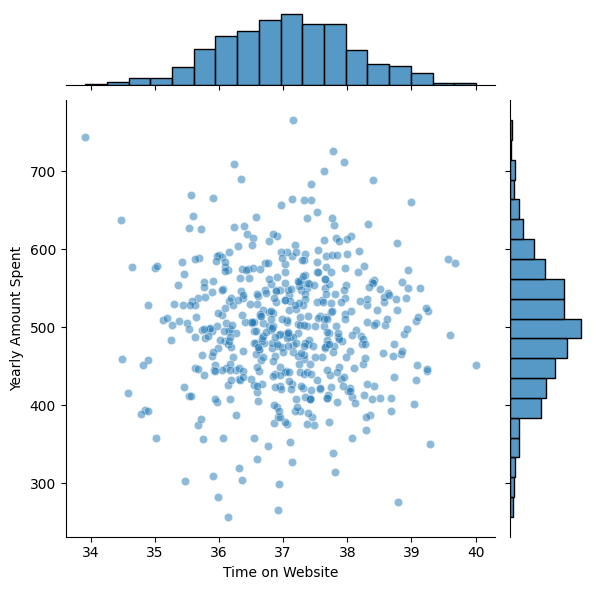

In [11]:
sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data=df, alpha=0.5)

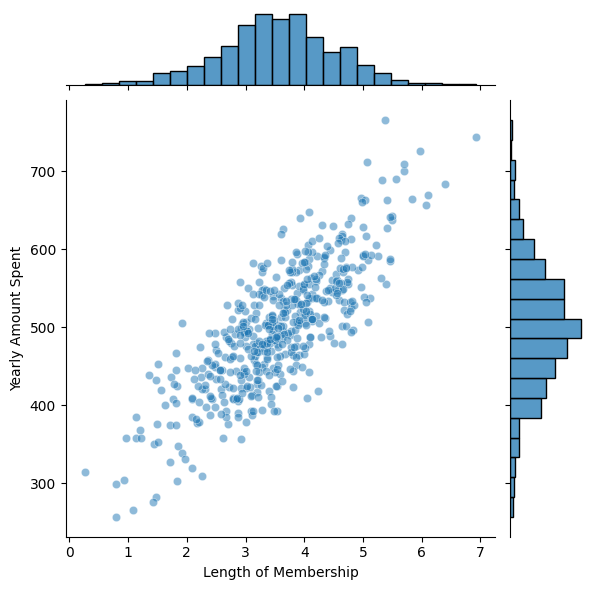

In [12]:
sns.jointplot(x="Length of Membership",y="Yearly Amount Spent",data=df, alpha=0.5)

In [13]:
df["Length of Membership"].corr(df["Yearly Amount Spent"]) # Lenght of member ship is highly correlected

0.809083568247581

In [14]:
df["Avg. Session Length"].corr(df["Yearly Amount Spent"]) 

0.3550882947076432

In [15]:
df["Time on Website"].corr(df["Yearly Amount Spent"]) # Time on webiste is low correlected

-0.0026408446721588943

In [16]:
df["Time on App"].corr(df["Yearly Amount Spent"])

0.49932777005345036

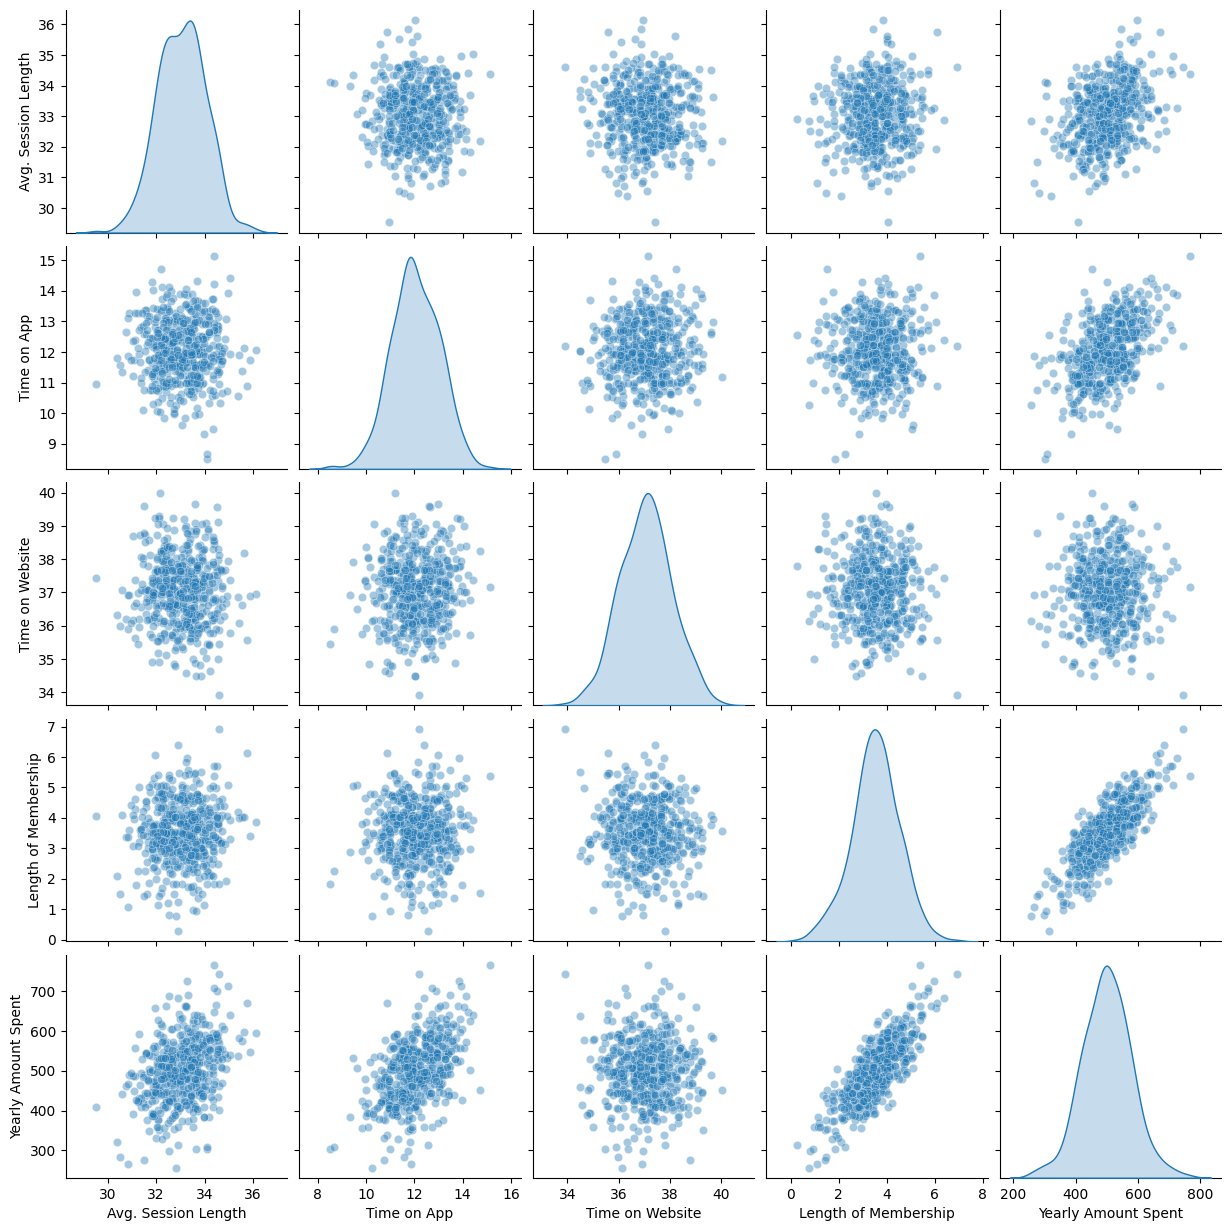

In [17]:
sns.pairplot(df,
            kind="scatter",
            plot_kws={"alpha":0.4},
            diag_kind="kde")

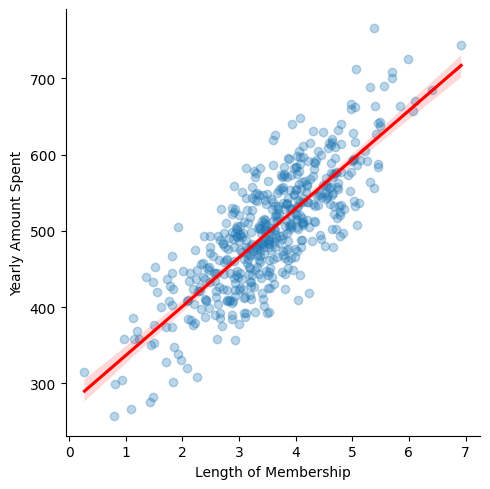

In [18]:
sns.lmplot(x="Length of Membership",
          y="Yearly Amount Spent",
          data=df,
          scatter_kws={"alpha":0.3},
          line_kws={"color":"red"})

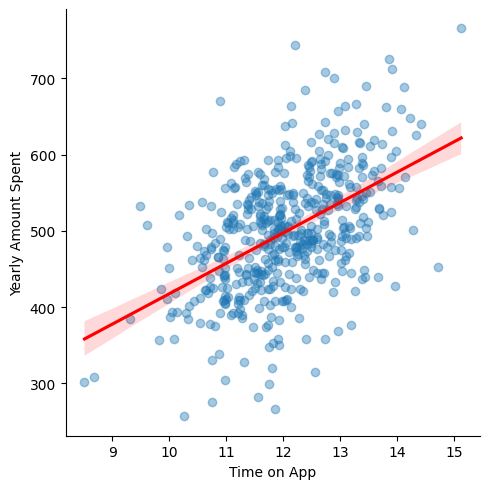

In [19]:
sns.lmplot(x="Time on App",
          y="Yearly Amount Spent",
          data=df,
          scatter_kws={"alpha":0.4},
          line_kws={"color":"red"})

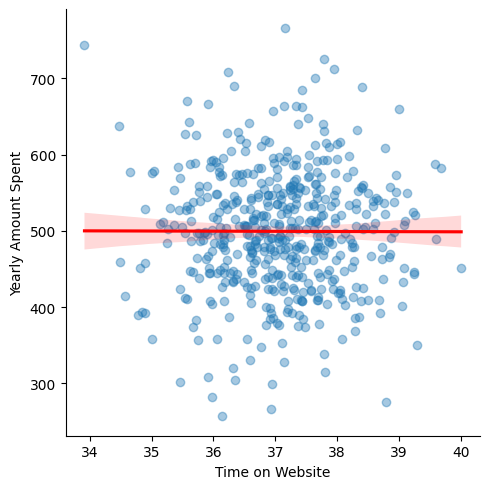

In [20]:
sns.lmplot(x="Time on Website",
          y="Yearly Amount Spent",
          data=df,
          scatter_kws={"alpha":0.4},
          line_kws={"color":"red"})

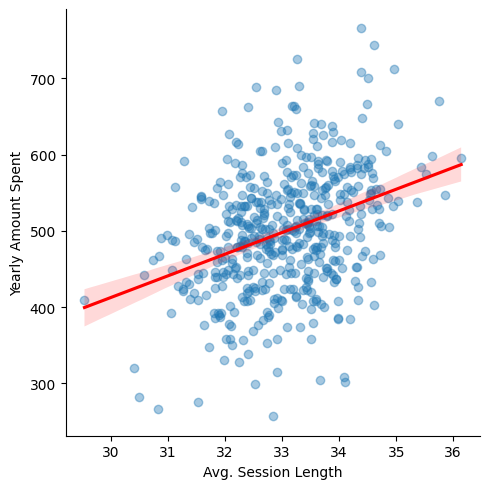

In [21]:
sns.lmplot(x="Avg. Session Length",
          y="Yearly Amount Spent",
          data=df,
          scatter_kws={"alpha":0.4},
          line_kws={"color":"red"})

# Spliting Data 

In [22]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm=LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

# Training the model with multivariable regression using OLS
- Allows us to get more details about the moel

In [29]:
# import statsmodels.api as sm
# X = sm.add_constant(X_train)
# model = sm.OLS(y_train, X)
# model_fit = model.fit()
# print(model_fit.summary())

# Predicting Test Data

In [30]:
predictions = lm.predict(X_test)

In [31]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

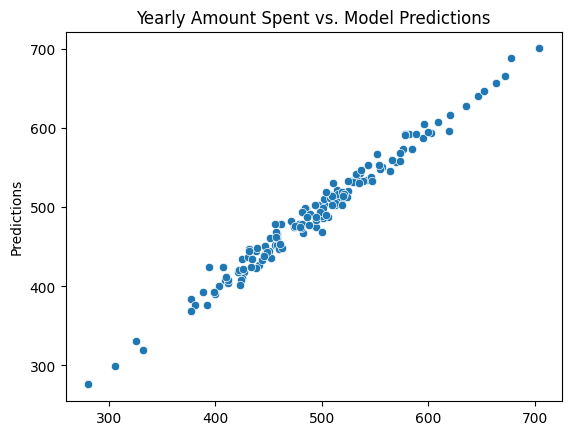

In [32]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x= predictions,y= y_test)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

C:\Users\SAJID\AppData\Local\Temp\ipykernel_14760\339810671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

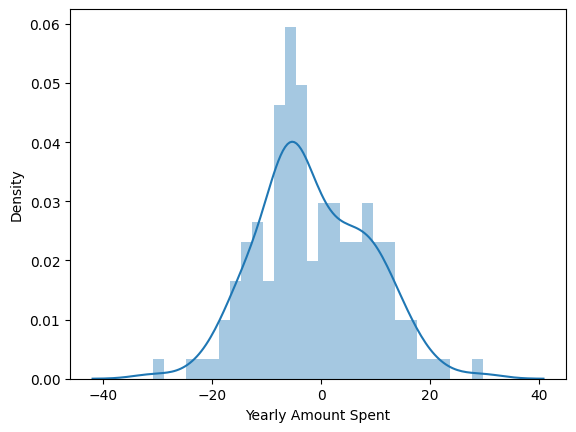

In [35]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

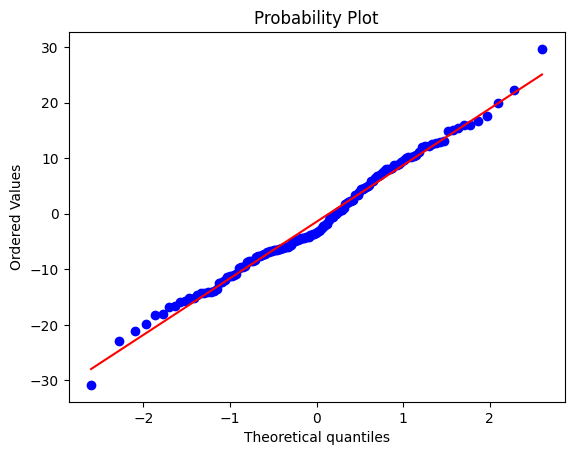

In [36]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()